In [1]:
import tensorflow as tf

# 打印 TensorFlow 的版本
print(tf.__version__)


2.8.0


# tf.keras 概述

In [2]:
import tensorflow as tf

tf.keras??


Type:        module
String form: <module 'keras.api._v2.keras' from '/usr/local/Caskroom/miniconda/base/envs/myenv/lib/python3.9/site-packages/keras/api/_v2/keras/__init__.py'>
File:        /usr/local/Caskroom/miniconda/base/envs/myenv/lib/python3.9/site-packages/keras/api/_v2/keras/__init__.py
Source:     
# This file is MACHINE GENERATED! Do not edit.
# Generated by: tensorflow/python/tools/api/generator/create_python_api.py script.
"""Public API for tf.keras namespace.
"""

import sys as _sys

from keras import __version__
from keras.api._v2.keras import __internal__
from keras.api._v2.keras import activations
from keras.api._v2.keras import applications
from keras.api._v2.keras import backend
from keras.api._v2.keras import callbacks
from keras.api._v2.keras import constraints
from keras.api._v2.keras import datasets
from keras.api._v2.keras import estimator
from keras.api._v2.keras import experimental
from keras.api._v2.keras import initializers
from keras.api._v2.keras import lay

### 1. 使用 tf.keras 实现一个简单的线性回归

In [1]:
import tensorflow as tf
import pandas as pd

# 导入数据
data = pd.read_csv('./dataset/income1.csv')
data

,Unnamed: 0,Education,Income
0,1,10.000000,26.658839
1,2,10.401338,27.306435
2,3,10.842809,22.132410
3,4,11.244147,21.169841
4,5,11.645449,15.192634
5,6,12.086957,26.398951
6,7,12.048829,17.435307
7,8,12.889632,25.507885
8,9,13.290970,36.884595
9,10,13.732441,39.666109


In [4]:
import matplotlib.pyplot as ply
%matplotlib inline

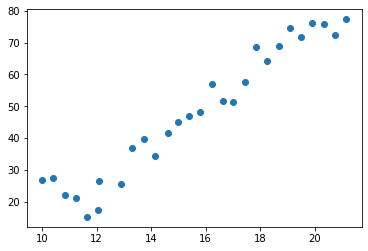

In [5]:
ply.scatter(data.Education, data.Income)

#### 单变量先行回归算法 （比如，x代表学历，f(x)代表收入）：

f(x) = ax + b

我们使用 f(x) 这个函数来映射输入特征和输出值



#### 预测目标与损失函数

目标：
预测函数 f(x) 与真实值之间的整体误差最小

如何定义误差最小呢？

1. 损失函数：

使用**均方差**作为成本函数。也就是，预测值和真实值之间差的平方取均值。

2. 优化目标：

找到合适的 a 和 b，使得 $(f(x) - y) ^ 2 / n$ 越小越好

这里求解的是 a 和 b

3. 如何优化：

使用梯度下降算法（深度学习的核心的算法）：

In [6]:
x = data.Education
y = data.Income

In [7]:
# 顺序模型
model = tf.keras.Sequential()

2022-03-25 13:18:17.280151: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
# 为模型添加层
model.add(tf.keras.layers.Dense(1, input_shape=(1, )))

In [18]:
# 模型的摘要
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [10]:
# 编译模型
model.compile(
    optimizer = 'adam',
    loss = 'mse'
)

In [14]:
# 训练模型
history = model.fit(x, y, epochs=1000)

Epoch 1/1000
1/1 [==============================] - 0s 4ms/step - loss: 3290.8333
Epoch 2/1000
1/1 [==============================] - 0s 3ms/step - loss: 3289.1277
Epoch 3/1000
1/1 [==============================] - 0s 4ms/step - loss: 3287.4236
Epoch 4/1000
1/1 [==============================] - 0s 4ms/step - loss: 3285.7200
Epoch 5/1000
1/1 [==============================] - 0s 3ms/step - loss: 3284.0168
Epoch 6/1000
1/1 [==============================] - 0s 3ms/step - loss: 3282.3142
Epoch 7/1000
1/1 [==============================] - 0s 4ms/step - loss: 3280.6121
Epoch 8/1000
1/1 [==============================] - 0s 3ms/step - loss: 3278.9109
Epoch 9/1000
1/1 [==============================] - 0s 3ms/step - loss: 3277.2107
Epoch 10/1000
1/1 [==============================] - 0s 5ms/step - loss: 3275.5105
Epoch 11/1000
1/1 [==============================] - 0s 4ms/step - loss: 3273.8110
Epoch 12/1000
1/1 [==============================] - 0s 3ms/step - loss: 3272.1128
Epoch 13/1000

In [15]:
model.predict(x)

array([[ 6.271783 ],
       [ 6.4517155],
       [ 6.6496415],
       [ 6.8295746],
       [ 7.009491 ],
       [ 7.2074337],
       [ 7.1903396],
       [ 7.5672994],
       [ 7.747232 ],
       [ 7.945158 ],
       [ 8.125091 ],
       [ 8.349857 ],
       [ 8.503847 ],
       [ 8.682882 ],
       [ 8.862816 ],
       [ 9.060741 ],
       [ 9.240675 ],
       [ 9.420607 ],
       [ 9.618534 ],
       [ 9.798466 ],
       [ 9.978399 ],
       [10.176325 ],
       [10.356258 ],
       [10.53619  ],
       [10.716124 ],
       [10.914049 ],
       [11.093983 ],
       [11.2783985]], dtype=float32)

In [17]:
# 预测
model.predict(pd.Series([20, 21]))

array([[10.75511 ],
       [11.203442]], dtype=float32)